CISC-873-DM-W23-A3 ❤️
This Notebook is divided into two parts:
1. Answring some questions about data mining subject. 🤓
2. A3 Reddit Fake Post Detection problem.

Kaggle account name: Manar Elghobashy.

## 1. Answring some questions about data mining subject🤓:
-----------------------------------------------------------------------
#### Q1:What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?
Character n-gram is a contiguous series of n characters from a given sample of text or speech, whereas word n-grams is is a contiguous series of n words from a given sample of text or speech, and the one who will suffer from the out-of-vocabulary issue is word n-gram
* Character n-gram
  * Character n-grams are found in text documents by representing the document as a sequence of characters.
  * Character n-grams have proven to be of high quality for authorship attribution.
  *Character n-grams are including whitespaces and punctuation.
  * example, a character 4-gram model results in the following tokens: [It], [It_i], [t_is], [is], [is_a], [s_a_], [_a_s].
* word n-gram
  * Word n-grams are found in text documents by representing the document as a sequence of words.
  * example, a character 1-gram model results in the following tokens: [hello], [like], [eat].
  
* The word is OOV. An Out-Of-Vocabulary (OOV) Word is a Linguistic Unit or a token that does not appear in training vocabulary or document.
--------------------------------------------------------------------------------
### Q2:What is the difference between stop word removal and stemming? Are these techniques language-dependent?
Both, Are the most important preprocessing techniques for text, but the main difference is that the stop word removal totally remove some predefined words that it knows from the sentence and have a list of these words, in other hand, stemming is about to reduce the word and return it to its root, like removing suffix and prefixes not removing the whole word, ex (playing -> play), etc, both are language dependant stop words in English not like in German and vice versa also the grammars in English not like in the German language.
* stop words:
  * Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.
  * Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.
* stemming:
  * Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. Examples of stemming in English are "studies" when we use the stemming it will be "studi".
* the stop words and the stemming are language-dependent.
--------------------------------------------------------------------------------
### Q3: Is tokenization techniques language dependent? Why?
* yes, tokenization is dependent on language. Each language can have various linguistic rules and exceptions. Languages such as English identify token boundaries via whitespace and punctuation, but other languages such as Chinese require a more complex segmenter to extract tokens from a stream of text that does not contain any whitespaces.
--------------------------------------------------------------------------------
### Q4: What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?
* count vectorizer used to convert a text into a vector-based on the frequency (count) of each word that appears throughout the text, whereas tf-idf vectorizer it divides into two parts TF which is refer to term frequency where we count how many time that the word appears in the text and then dividing it by the total numbers of words in the whole text, where IDF is about taking the logarithm to the previous result to decrease the weight of a common word in the sentence or document, it wouldn't be feasiable and it would be np-complete problem,but you can select them by using some of search method techniques like (Grid search, random search).
* The time it takes to create the count. Vectorizer is much lesser as compared to your hashing function or the tf-idf representation.
* CountVectorizer: Counts the frequency of all words in our corpus, sorts them and grabs the most recurring features (using max_features hyperparameter). But these results are mostly biased and our model might loose out on some of the important less frequent features. These are all boolean values. Ex. SEO People used to take advantage of this.
* TFIDFVectorizer: TFIDF is a statistical measure said to have fixed the issues with CountVectorizer in some way. It consists of 2 parts, TF (Term Frequency) multiplied with IDF (Inverse Document Frequency). The main intuition being some words that appear frequently in 1 document and less frequently in other documents could be considered as providing extra insight for that 1 document and could help our model learn from this additional piece of information. In short, common words are penalized. These are relative frequencies identified as floating point numbers.

### Would it be feasible to use all possible n-grams? If not, how should you select them? 
* No, This will make it very difficult to assign likelihoods that capture the target of our analysis.
* it will depand on the model and i will try different n to decide the best n. because If we consider a chunk size of n=2, our results include “The reporters,” “the President,” “the United,” and “the room.” While not perfect, this model successfully identifies three of the relevant entities as candidates in a lightweight fashion.
* On the other hand, a model based on the small n-gram window of 2 would fail to capture some of the nuance of the original text. For instance, if our sentence is from a text that references multiple heads of state, “the President” could be somewhat ambiguous. In order to capture the entirety of the phrase “the President of the United States,”
-------------------------------------------------------------------------------



### Problem formulation:
our problem here is about building a model to classify and detect which real news and fake news from just its titles, our inputs here are news titles (59151) observations for a training dataset and the output is (59151) label.


### Data mining function:
text preprocessing (stemming and lemmatizing) -> tokenization and vectorization each text -> building and training the model -> classification and prediction.
### The challenges:
We have a quite big data set so maybe will take some time to preprocess it and train it.

Our input here is dirty text, each observation here has a lot of punctuation  and misspellings, and grammatical mistakes because each title here is typed by humans, so we need to choose a proper text cleaning technique by trying each one them and choose the one who give us best results.

Even if we cleaned our input here, it's still string data and machine learning models can't deal with string data so we need to convert them into numeric data by technique called vectorization.

#### The impact:
Building this model will solve many social problems and prevent the spread of rumors on social media quickly.

#### Experimental protocol:
* Read training data.
* Preprocessing:
  * cleaning input data for both training set and test set using some regular expressions patterns and stemming or lemmatizing each text.
* Data exploration
* Data vectorization: There are two famous vectorization techniques count vectorizer and tf-idf vectorizer we will try each one of them and choose the one who will give us best results.
* Building our piplines (has the vectorizer and machine learning model)
* Build the search speace and search for the best hyperparameters combinations but trying many fits.
* Test our model
* Choose the best one
--------------------------------------------------------------------------------


## In this notebook:
1. read and preprocess the data.
2. build pipelines and models:
  * XGB model
  * Logistic Regression
  * Random Forest.

## 1. read and preprocess the data

import required data

In [30]:
# important some required libraries.
import re # for regular expressions.
import pickle # to convert object to byte stream.
import pandas as pd # # data processing, CSV file I/O.
import numpy as np # linear algebra.
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)
# import required libraries for building the model.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.feature_extraction.text import TfidfVectorizer # Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer # Natural Language Toolkit
from nltk.tokenize import word_tokenize # NLTK Tokenizer Package.
from nltk.corpus import stopwords #contains all the stop words.
from nltk.stem import WordNetLemmatizer #lemmatization package.
import nltk 
from nltk.corpus import wordnet
from nltk.tag import pos_tag

Read train/test data csv files.

In [31]:
# read csv files for train and test data.
train_data=pd.read_csv("xy_train.csv", index_col='id')
test_data=pd.read_csv("x_test.csv")
sample_data=pd.read_csv("sample_submission.csv")
id_test=test_data['id']

display some information of the data

In [32]:
# display some information on the sample data to see how we will create the submission file.
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59151 entries, 0 to 59150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      59151 non-null  int64  
 1   label   59151 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 924.4 KB


In [33]:
train_data.head()

,text,label
id,,
265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0


In [34]:
test_data.head()

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility"
4,4,"""Believers"" - Hezbollah 2011"


check if there is null in the data

In [35]:
# see if there is null in the train data.
train_data.isnull().sum()

text     0
label    0
dtype: int64

In [36]:
# see if there is null in the test data.
test_data.isnull().sum()

id      0
text    0
dtype: int64

 some preprocess on the label column

In [37]:
# see the unique values of the label column.
train_data['label'].unique()

array([0, 1, 2])

In [38]:
# see count of every label in the label column.
train_data['label'].value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

In [39]:
# drop label =2 as the label must be 0 or 1.
train_data = train_data.drop(train_data[train_data.label == 2].index)
train_data.label = train_data.label.astype('int8')

In [40]:
train_data['label'].value_counts()

0    32172
1    27596
Name: label, dtype: int64

In this part, three functions are built:
* one named "clean_Regex" is to remove punctuation, stop words, etc.
* the second one is to apply lemmatizations and this function called "lemmatize_clean_text"
* the last one, is for apply the stemming called "stemming_clean_text"

In [41]:
#download english stop words to remove the from the text.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('tagsets')
stop_words = set(stopwords.words("english"))

# build a function which take simple regex and apply them in the text.
# this function will remove any html tags, single letter characters, and replace all whitespaces with sinhle whitespace
def clean_Regex(text, for_embedding):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace

    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) 
    RE_TAGS = re.compile(r"<.*?>") 
    RE_ASCII = re.compile(r"[^A-Za-z0-9]+", re.IGNORECASE) 
    RE_SINGLECHAR = re.compile(r"\b^[^A-Za-z0-9]+\b", re.IGNORECASE) 
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-z,.!? ]", re.IGNORECASE) 
        RE_SINGLECHAR = re.compile(r"\b[A-Za-z,.!?]\b", re.IGNORECASE) 

    text = re.sub(RE_TAGS, " ", text) 
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text) 
    text = re.sub(RE_WSPACE, " ", text) 
    word_tokens = word_tokenize(text) # a built-in function that will split the text into tokens. 
    
    return word_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [42]:
# function to determine the word tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V') or tag.startswith('M'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# define a function that apply lemmatization on the text.
# stemming identifies the original form of a word.
# example: changing-->change, changes-->change.
def lemmatize_clean_text(text ,for_embedding=False):

    """ steps:
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and lemmatize
    """

    lemmatizer = WordNetLemmatizer()

    word_tokens = clean_Regex(text, for_embedding)
    pos_tags= pos_tag(word_tokens)
    if for_embedding:
        # no stemming or lemmatization, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        # apply lemmatizing, lowering and punctuation / stopwords removal.
        words_tokens_lower = [word.lower() for word in word_tokens]
        words_filtered = [lemmatizer.lemmatize(word,pos=get_wordnet_pos(pos)) for word, pos in pos_tags if word not in stop_words]

    clean_text = " ".join(words_filtered)
    return clean_text

In [43]:
# define a function that apply stemming on the text.
# stemming identifies the common root form of a word by removing or replacing word suffixes.
# example: changing-->chang, change-->chang.
def stemming_clean_text(text ,for_embedding=False):
    """ steps:
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemming
    """

    stemmer = SnowballStemmer("english")
    # for_embedding by default false in the function.
    word_tokens = clean_Regex(text,for_embedding=False)

    if for_embedding:
        # no stemming or lemmatization, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        # apply stemming, lowering and punctuation / stopwords removal.
        words_tokens_lower = [word.lower() for word in word_tokens]
        words_filtered = [stemmer.stem(word) for word in words_tokens_lower if word not in stop_words]

    processed_text = " ".join(words_filtered)
    return processed_text

test lemmatization and stemming functions.

In [44]:
stemming_clean_text("changing")

'chang'

In [45]:
lemmatize_clean_text("changing")

'change'

apply lemmatization and stemming on test in the train/test data

In [46]:
# apply the lammatization/stemming on the training and testing data.
data_lemmatized = train_data["text"].map(lambda x: lemmatize_clean_text(x ,for_embedding=False) if isinstance(x, str) else x).copy() ## clean and lemmatiz training set
data_stemmed = train_data["text"].map(lambda x: stemming_clean_text(x, for_embedding=False) if isinstance(x, str) else x).copy() ## word cleaning and stemming training set
test_lemmatized = test_data["text"].map(lambda x: lemmatize_clean_text(x ,for_embedding=False) if isinstance(x, str) else x).copy() ## word cleaning and lemmatizing test set
test_stemmed = test_data["text"].map(lambda x: stemming_clean_text(x ,for_embedding=False) if isinstance(x, str) else x).copy() ## word cleaning and stemming testing data

see word frequencies by lemmatization and stemming.

In [47]:
word_freq_lemmatized = pd.Series(" ".join(data_lemmatized).split()).value_counts()
word_freq_lemmatized[1:40]

I           8936
A           5634
This        4636
0           4307
To          3506
year        3394
get         2991
make        2856
like        2686
Trump       2504
It          2503
look        2453
one         2433
In          2326
say         2319
find        2167
take        2132
Of          2108
My          2039
2           1987
old         1938
You         1925
use         1894
He          1874
first       1762
go          1736
1           1697
people      1668
new         1611
man         1567
time        1545
For         1484
Is          1479
They        1466
poster      1446
And         1434
New         1414
see         1411
colorize    1361
dtype: int64

In [48]:
word_freq_stemmed = pd.Series(" ".join(data_stemmed).split()).value_counts()
word_freq_stemmed[1:40]

year        4125
one         3285
like        3128
new         2998
look        2847
color       2737
man         2728
get         2602
trump       2578
say         2347
peopl       2316
use         2307
first       2248
make        2227
old         2226
time        2027
poster      2000
found       1999
2           1986
day         1934
war         1858
1           1697
post        1648
world       1570
work        1531
show        1513
american    1504
us          1504
take        1491
life        1481
psbattl     1470
help        1442
go          1418
state       1409
back        1369
two         1364
school      1345
see         1329
photo       1324
dtype: int64

In [49]:
word_freq_stemmed[-10:].reset_index(name="freq")

,index,freq
0,darli,1
1,cvtwtq,1
2,cornerston,1
3,soot,1
4,codina,1
5,sebasti,1
6,nearsight,1
7,poaq69oe7ti31,1
8,1741x2604,1
9,110k,1


display labels values in the training data

<Axes: title={'center': 'Balanced dataset'}>

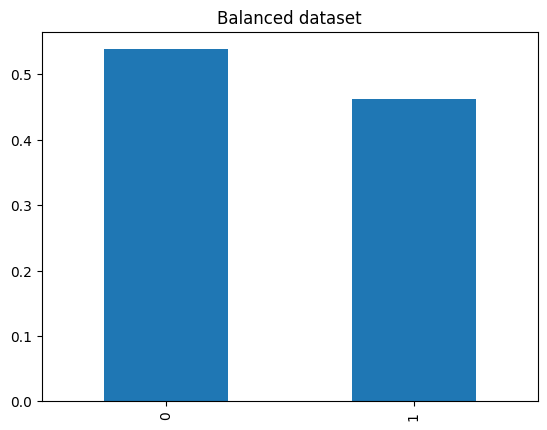

In [50]:
# a visualzation of the label values and thier count in the train data file.
train_data["label"].value_counts(normalize=True).plot(kind='bar',title='Balanced dataset')

split the lemmatize and stemmed data into train and validation

In [51]:
#split data_lemmatized feature

# split the original training set to a train and a validation set becuase we will use them in search method

X_train_1 , X_val_1 , Y_train_1, Y_val_1 = train_test_split(data_lemmatized,train_data['label'],stratify=train_data['label'], random_state=42, test_size=0.25, shuffle=True)


split_index_lemmatized = [-1 if x in X_train_1.index else 0 for x in data_lemmatized.index]

print(X_train_1.shape)
print(X_val_1.shape)

(44826,)
(14942,)


In [52]:
#split data_stemmed feature

#Split the original training set to a train and a validation set becuase we will use them in search method

X_train_2, X_val_2 ,Y_train_2, Y_val_2 = train_test_split(data_stemmed,train_data['label'],stratify=train_data['label'], random_state=42, test_size=0.25, shuffle=True)


split_index_stemmed = [-1 if x in X_train_2.index else 0 for x in data_stemmed.index]


print(X_train_2.shape)
print(X_val_2.shape)

(44826,)
(14942,)


## 2. build pipelines and models:


### 2.1 logistic regression:
* two trails are applied using logistic regression one using lemmatized data and one using stemmed data.

#### 2.1.1 logistic regression using stemmed data and validation set:
in this trial the hyperparameter space iclude:
* ngram_range": [(1, 2), (1, 3), (1,4), (1,5)]
* max_df": np.arange(0.2, 1.0)
* min_df": np.arange(5, 100)
* analyzer": ['word','char','char_wb']
* strip_accents":[None,'ascii','unicode']
* smooth_idf':[False,True]
* sublinear_tf":[True,False] 

and a random search is used using validation set


In [ ]:
# feature creation and modelling in a single function
pipe_lg = Pipeline([("tfidf", TfidfVectorizer()), ("lg", LogisticRegression(max_iter=10000,random_state=42,n_jobs=-1))])

ps_1 = PredefinedSplit(split_index_stemmed)


# define parameter space to test
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
    "tfidf__max_df": np.arange(0.2, 1.0),
    "tfidf__min_df": np.arange(5, 100),
    "tfidf__analyzer": ['word','char','char_wb'],
    "tfidf__strip_accents":[None,'ascii','unicode'],
    'tfidf__smooth_idf':[False,True],
    "tfidf__sublinear_tf":[True,False]
}

# here we still use data_lemmatized; but the random search model will use our predefined split internally to determine which sample belongs to the validation set

pipe_lg_clf = RandomizedSearchCV(pipe_lg, params, n_jobs=-1,cv=ps_1, scoring="roc_auc", n_iter=50)
pipe_lg_clf.fit(data_stemmed, train_data['label'])



RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lg',
                                              LogisticRegression(max_iter=10000,
                                                                 n_jobs=-1,
                                                                 random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'tfidf__analyzer': ['word', 'char',
                                                            'char_wb'],
                                        'tfidf__max_df': array([0.2]),
                                        'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11...
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'tfidf__ngram_range': [(1, 2), (1, 3),
                                                               (1, 4), (1, 5)],
                                        'tfidf__smooth_idf': [False, True],
                                        'tfidf__strip_accents': [None, 'ascii',
                                                                 'unicode'],
                                        'tfidf__sublinear_tf': [True, False]},
                   scoring='roc_auc')

In [ ]:
# see the bst score and the best hyperparameter combination.
print('best score {}'.format(pipe_lg_clf.best_score_))
print('best score {}'.format(pipe_lg_clf.best_params_))

best score 0.8866824259235542
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': 'unicode', 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 5, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'word'}


In [ ]:
# make a submission for the logreg using different search methods.
submission = pd.DataFrame()

submission['id'] = id_test

submission['label'] = pipe_lg_clf.predict_proba(test_stemmed)[:,1]

submission.to_csv('sample_submission_lg_rand2.csv', index=False)

This model has hyperparaneters:
* ngram_range": [ (1,5)]
* max_df": 0.2
* min_df": 5
* analyzer": ['word ']
* strip_accents":['unicode']
* smooth_idf':[False]
* sublinear_tf":[True]

in the hyperparameter space, analyzer was defined as a set of word, char, and char_wb and the result was using analyzer word so here **word-level vectorizer** is covered.
 * model accuarcy in colab: 0.88668
 * model accuracy in kaggle public: 0.81474
--------------------------------------------------------------------------------

#### 2.1.2 logistic regression using lemmatized data and validation set:
in this trial the hyperparameter space iclude:
* ngram_range": [(1, 2), (1, 3), (1,4), (1,5)]
* max_df": np.arange(0.2, 1.0)
* min_df": np.arange(5, 100)
* analyzer": ['char']
* strip_accents":[None,'ascii','unicode']
* smooth_idf':[False,True]
* sublinear_tf":[True,False] 

and a random search is used using validation set
here in the hyperparamter space the analyzer is set to 'char' so that **character-level vectorizer** is covered.

In [53]:
# feature creation and modelling in a single function
pipe_lg = Pipeline([("tfidf", TfidfVectorizer()), ("lg", LogisticRegression(max_iter=10000,random_state=42,n_jobs=-1))])

ps_1 = PredefinedSplit(split_index_stemmed)


# define parameter space to test
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
    "tfidf__max_df": np.arange(0.2, 1.0),
    "tfidf__min_df": np.arange(5, 100),
    "tfidf__analyzer": ['char'],
    "tfidf__strip_accents":[None,'ascii','unicode'],
    'tfidf__smooth_idf':[False,True],
    "tfidf__sublinear_tf":[True,False]
}

# here we still use data_lemmatized; but the random search model will use our predefined split internally to determine which sample belongs to the validation set

pipe_lg_clf = RandomizedSearchCV(pipe_lg, params, n_jobs=-1,cv=ps_1, scoring="roc_auc", n_iter=50)
pipe_lg_clf.fit(data_lemmatized, train_data['label'])



RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lg',
                                              LogisticRegression(max_iter=10000,
                                                                 n_jobs=-1,
                                                                 random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'tfidf__analyzer': ['char'],
                                        'tfidf__max_df': array([0.2]),
                                        'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 1...
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'tfidf__ngram_range': [(1, 2), (1, 3),
                                                               (1, 4), (1, 5)],
                                        'tfidf__smooth_idf': [False, True],
                                        'tfidf__strip_accents': [None, 'ascii',
                                                                 'unicode'],
                                        'tfidf__sublinear_tf': [True, False]},
                   scoring='roc_auc')

In [54]:
# see the bst score and the best hyperparameter combination.
print('best score {}'.format(pipe_lg_clf.best_score_))
print('best score {}'.format(pipe_lg_clf.best_params_))

best score 0.9068108280220225
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': 'unicode', 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 56, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'char'}


In [ ]:
# make a submission for the logreg using different search methods.
submission = pd.DataFrame()

submission['id'] = id_test

submission['label'] = pipe_lg_clf.predict_proba(test_lemmatized)[:,1]

submission.to_csv('sample_submission_lgword_rand4.csv', index=False)

This model has hyperparaneters:
* ngram_range": [ (1,5)]
* max_df":0.2
* min_df": 9
* analyzer": ['word ']
* strip_accents":['unicode']
* smooth_idf':[False]
* sublinear_tf":[True]

in the hyperparameter space, analyzer was defined as a set of  charand the result was using analyzer word so here **char-level vectorizer** is covered.
 * model accuarcy in colab: 0.9030
 * model accuracy in kaggle public: 0.85222
 -------------------------------------------------------------------------------
 

### 2.2.1 XGB classifier using lemmatized data and validation set:
in this trial the hyperparameter space:
* ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
* max_df": np.arange(0.2, 1.0),
* min_df": np.arange(5, 100),
* strip_accents":[None,'ascii','unicode'],
* analyzer':['word'],
* smooth_idf':[False,True],
* sublinear_tf":[True,False]

this XGB classifier model cover word-level vectorizer and validation set.

In [ ]:
# feature creation and modelling in a single function
pipe_xgb = Pipeline([("tfidf", TfidfVectorizer()), ("xgb", XGBClassifier(random_state=42,n_jobs=-1,eval_metric='rmse',use_label_encoder=False))])

ps_2 = PredefinedSplit(split_index_lemmatized)


# define parameter space to test
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
    "tfidf__max_df": np.arange(0.2, 1.0),
    "tfidf__min_df": np.arange(5, 100),
    "tfidf__strip_accents":[None,'ascii','unicode'],
    'tfidf__analyzer':['word'],
    'tfidf__smooth_idf':[False,True],
    "tfidf__sublinear_tf":[True,False]
}

# here we still use data_lemmatized; but the random search model will use our predefined split internally to determine which sample belongs to the validation set

pipe_xgb_clf = RandomizedSearchCV(pipe_xgb, params, n_jobs=-1,cv=ps_2, scoring="roc_auc", n_iter=45)
pipe_xgb_clf.fit(data_lemmatized, train_data['label'])

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='rmse',
                                                            feature_types=None,...
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'tfidf__ngram_range': [(1, 2), (1, 3),
                                                               (1, 4), (1, 5)],
                                        'tfidf__smooth_idf': [False, True],
                                        'tfidf__strip_accents': [None, 'ascii',
                                                                 'unicode'],
                                        'tfidf__sublinear_tf': [True, False]},
                   scoring='roc_auc')

In [ ]:
# see the bst score and the best hyperparameter combination.
print('best score {}'.format(pipe_xgb_clf.best_score_))
print('best score {}'.format(pipe_xgb_clf.best_params_))

best score 0.8677225239024977
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': 'ascii', 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 4), 'tfidf__min_df': 6, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'word'}


In [ ]:
# create submission file for XGB model using rando search.
submission = pd.DataFrame()
submission['id'] = id_test
submission['label'] = pipe_xgb_clf.predict_proba(test_lemmatized)[:,1]
submission.to_csv('sample_submission_walkthrough_xgblemma.csv', index=False)

the best hyperparameter in this model:
* ngram_range": (1,4)
* max_df": 0.2
* min_df": 6
* strip_accents":['ascii']
* analyzer':['word']
* smooth_idf':[False]
* sublinear_tf":[True]

in the hyperparameter space, analyzer was defined as a set of word and the result was using analyzer word so here **word-level vectorizer** is covered.
 * model accuarcy in colab: 0.8677
 * model accuracy in kaggle public: 0.79933
 ------------------------------------------------------------------------------

### 2.2.2 XGB classifier using stemmed data and validation set:
in this trial the hyperparameter space:
* ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
* max_df": np.arange(0.2, 1.0),
* min_df": np.arange(5, 100),
* strip_accents":[None,'ascii','unicode'],
* analyzer':['word'],
* smooth_idf':[False,True],
* sublinear_tf":[True,False]

this XGB classifier model cover word-level vectorizer and validation set.

In [ ]:
# feature creation and modelling in a single function
pipe_xgb = Pipeline([("tfidf", TfidfVectorizer()), ("xgb", XGBClassifier(random_state=42,n_jobs=-1,eval_metric='rmse',use_label_encoder=False))])

ps_2 = PredefinedSplit(split_index_lemmatized)


# define parameter space to test
params = {
    "tfidf__ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
    "tfidf__max_df": np.arange(0.2, 1.0),
    "tfidf__min_df": np.arange(5, 100),
    "tfidf__strip_accents":[None,'ascii','unicode'],
    'tfidf__analyzer':['word'],
    'tfidf__smooth_idf':[False,True],
    "tfidf__sublinear_tf":[True,False]
}

# here we still use data_lemmatized; but the random search model will use our predefined split internally to determine which sample belongs to the validation set

pipe_xgb_clf = RandomizedSearchCV(pipe_xgb, params, n_jobs=-1,cv=ps_2, scoring="roc_auc", n_iter=45)
pipe_xgb_clf.fit(data_stemmed, train_data['label'])

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='rmse',
                                                            feature_types=None,...
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'tfidf__ngram_range': [(1, 2), (1, 3),
                                                               (1, 4), (1, 5)],
                                        'tfidf__smooth_idf': [False, True],
                                        'tfidf__strip_accents': [None, 'ascii',
                                                                 'unicode'],
                                        'tfidf__sublinear_tf': [True, False]},
                   scoring='roc_auc')

In [ ]:
# see the bst score and the best hyperparameter combination.
print('best score {}'.format(pipe_xgb_clf.best_score_))
print('best score {}'.format(pipe_xgb_clf.best_params_))

best score 0.8430106985649337
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': None, 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 40, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'word'}


In [ ]:
# create a submission file for XGB model using random search.
submission = pd.DataFrame()
submission['id'] = id_test
submission['label'] = pipe_xgb_clf.predict_proba(test_stemmed)[:,1]
submission.to_csv('sample_submission_walkthrough_stemmedxgb2.csv', index=False)

in this trial the hyperparameter space:
* ngram_range": [ (1,5)],
* max_df": 0.2
* min_df": 40
* strip_accents": None
* analyzer':['word'],
* smooth_idf':[False],
* sublinear_tf":[True]

in the hyperparameter space, analyzer was defined as a set of word and the result was using analyzer word so here **word-level vectorizer** is covered.
 * model accuarcy in colab: 0.8430
 * model accuracy in kaggle public: 0.77633
 ------------------------------------------------------------------------------

### 2.3.1 Random Forest classifier using lemmatized data and validation set:
Hyperparameter space:
* n_estimators':[50,100,150,200]
* max_depth':[3,4,5,10,15,20]
* criterion':['gini','entropy']
* min_samples_split':[2,3,4,6,7,8]

this model cover word-level vectorizer on random forest using random search and validation set

In [ ]:
# fit the random forest pipline with random search using the param_rand parameters space.
RF_pipline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)
RF_pipline

# hyperparameter space for random forest model
param_rand = {
    'my_classifier__n_estimators':[50,100,150,200],
    'my_classifier__max_depth':[3,4,5,10,15,20],
    'my_classifier__criterion':['gini','entropy'],
    'my_classifier__min_samples_split':[2,3,4,6,7,8],
}

rand_search_Rf = RandomizedSearchCV(RF_pipline, param_rand, cv=5, verbose=1, n_jobs=2, scoring='roc_auc')

rand_search_Rf.fit(data_lemmatized, train_data['label'])

# see the bst score and the best hyperparameter combination.
print('best score {}'.format(rand_search_Rf.best_score_))
print('best score {}'.format(rand_search_Rf.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8384719209195897
best score {'my_classifier__n_estimators': 150, 'my_classifier__min_samples_split': 6, 'my_classifier__max_depth': 10, 'my_classifier__criterion': 'entropy'}


In [ ]:
# create submission file for random forest file using random forest.
submission = pd.DataFrame()
submission['id'] = id_test
submission['label'] = rand_search_Rf.predict_proba(test_lemmatized)[:,1]
submission.to_csv('sample_submission_walkthrough_lemmaRF.csv', index=False)

best hyperparameter combination for this model:
* n_estimators':150
* max_depth':10
* criterion':['entropy']
* min_samples_split':6

in the hyperparameter space, analyzer was defined as a set of word and the result was using analyzer word so here **word-level vectorizer** is covered.
 * model accuarcy in colab: 0.8384
 * model accuracy in kaggle public: 0.78028
 ------------------------------------------------------------------------------

### 2.3.1 Random Forest classifier using stemmed data and validation set:
Hyperparameter space:
* n_estimators':[50,100,150,200]
* max_depth':[3,4,5,10,15,20]
* criterion':['gini','entropy']
* min_samples_split':[2,3,4,6,7,8]

this model cover word-level vectorizer on random forest using random search and validation set

In [ ]:
# fit the random forest pipline with random search using the param_rand parameters space.
RF_pipline = Pipeline(
    steps=[
        ("tfidf", TfidfVectorizer()),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)
RF_pipline

# hyperparameter space for random forest model
param_rand = {
    'my_classifier__n_estimators':[50,100,150,200],
    'my_classifier__max_depth':[3,4,5,10,15,20],
    'my_classifier__criterion':['gini','entropy'],
    'my_classifier__min_samples_split':[2,3,4,6,7,8],
}

rand_search_Rf = RandomizedSearchCV(RF_pipline, param_rand, cv=5, verbose=1, n_jobs=2, scoring='roc_auc')

rand_search_Rf.fit(data_stemmed, train_data['label'])

# see the bst score and the best hyperparameter combination.
print('best score {}'.format(rand_search_Rf.best_score_))
print('best score {}'.format(rand_search_Rf.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8155447077722325
best score {'my_classifier__n_estimators': 150, 'my_classifier__min_samples_split': 7, 'my_classifier__max_depth': 20, 'my_classifier__criterion': 'gini'}


In [ ]:
# create submission file for random forest model using random forest.
submission = pd.DataFrame()
submission['id'] = id_test
submission['label'] = rand_search_Rf.predict_proba(test_stemmed)[:,1]
submission.to_csv('sample_submission_walkthrough_stemmedRF.csv', index=False)

best hyperparameter combination for this model:
* n_estimators':150
* max_depth':20
* criterion':['gini']
* min_samples_split':7

in the hyperparameter space, analyzer was defined as a set of word and the result was using analyzer word so here **word-level vectorizer** is covered.
 * model accuarcy in colab: 0.8155
 * model accuracy in kaggle public: 0.80708
 ------------------------------------------------------------------------------

### Thanks 😃